In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we'll create


#Read the data
df = pd.read_csv(r'C:\Users\visha\OneDrive\Desktop\Data Analytics\Portfolio Projects\movies.csv')

In [2]:
#Look at the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
df['released'] = pd.to_datetime(df['released'].str.extract(r'(\w+ \d+, \d+)', expand=False), format = '%B %d, %Y')

In [4]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

    released  score      votes         director                   writer  \
0 1980-06-13    8.4   927000.0  Stanley Kubrick             Stephen King   
1 1980-07-02    5.8    65000.0   Randal Kleiser  Henry De Vere Stacpoole   
2 1980-06-20    8.7  1200000.0   Irvin Kershner           Leigh Brackett   
3 1980-07-02    7.7   221000.0     Jim Abrahams             Jim Abrahams   
4 1980-07-25    7.3   108000.0     Harold Ramis       Brian Doyle-Murray   

             star         country      budget        gross  \
0  Jack Nicholson  United Kingdom  19000000.0   46998772.0   
1  Brooke Shields   United States   4500000.0   58853106.0   
2     Mark Hamill   United States  18000000.0  538375067.0   
3     Robert Hays   United States   3500000.0   83453539.0   
4     Chevy Chase   United States   6000000.0   39846344.0   

              company  runtime  
0        Warner Bros.    146.0  
1   Columbia Pictures    104.0  
2           Lucasfilm    124.0  
3  Paramount Pictures     88.0  
4      Orion Pictures     98.0

In [5]:
#Check missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.007694314032342202%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
#Handle missing data
df = df.dropna()

In [7]:
#Again check missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [8]:
#Check data types of columns
df.dtypes

name                object
rating              object
genre               object
year                 int64
released    datetime64[ns]
score              float64
votes              float64
director            object
writer              object
star                object
country             object
budget             float64
gross              float64
company             object
runtime            float64
dtype: object

In [9]:
#Change the data types
df['released'] = df['released'].astype('object')
df['runtime'] = df['runtime'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [10]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

              released  score    votes         director  \
0  1980-06-13 00:00:00    8.4   927000  Stanley Kubrick   
1  1980-07-02 00:00:00    5.8    65000   Randal Kleiser   
2  1980-06-20 00:00:00    8.7  1200000   Irvin Kershner   
3  1980-07-02 00:00:00    7.7   221000     Jim Abrahams   
4  1980-07-25 00:00:00    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.      146  
1   58853106   Columbia Pictures      104  
2  538375067           Lucasfilm      124  
3   83453539  Paramount Pictures       88  
4   39846344      Orion Pictures       98

In [11]:
#Create new year column
df['year_corrected'] = df['released'].astype(str).str[:4]
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

              released  score    votes         director  \
0  1980-06-13 00:00:00    8.4   927000  Stanley Kubrick   
1  1980-07-02 00:00:00    5.8    65000   Randal Kleiser   
2  1980-06-20 00:00:00    8.7  1200000   Irvin Kershner   
3  1980-07-02 00:00:00    7.7   221000     Jim Abrahams   
4  1980-07-25 00:00:00    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime year_corrected  
0   46998772        Warner Bros.      146           1980  
1   58853106   Columbia Pictures      104           1980  
2  538375067           Lucasfilm      124           1980  
3   83453539  Paramount Pictures       88           1980  
4   39846344      Orion Pictures       98           1980

In [12]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                 released  score    votes       director              writer  \
5445  2009-12-18 00:00:00    7.8  1100000  James Cameron       James Cameron   
7445  2019-04-26 00:00:00    8.4   903000  Anthony Russo  Christopher Markus   
3045  1997-12-19 00:00:00    7.8  1100000  James Cameron       James Cameron   
6663  2015-12-18 00:00:00    7.8   876000    J.J. Abrams     Lawrence Kasdan   
7244  2018-04-27 00:00:00    8.4   897000  Anthony Russo  Christopher Markus   

                   star        country     budget       gross  \
5445    Sam Worthington  United States  237000000  2847246203   
7445  Robert Downey Jr.  United States  356000000  2797501328   
3045  Leonardo DiCaprio  United States  200000000  2201647264   
6663       Daisy Ridley  United States  245000000  2069521700   
7244  Robert Downey Jr.  United States  321000000  2048359754   

                    company  runtime year_corrected  
5445  Twentieth Century Fox      162           2009  
7445         Marvel Studios      181           2019  
3045  Twentieth Century Fox      194           1997  
6663              Lucasfilm      138           2015  
7244         Marvel Studios      149           2018

In [13]:
#Display maximum rows always
pd.set_option('display.max_rows', None)

In [14]:
#Drop any duplicates
df.drop_duplicates().sort_values(by=['company'], inplace=False, ascending=False)

name     rating      genre  \
7129                                     47 Meters Down      PG-13  Adventure   
5664                                          Incendies          R      Drama   
4007                                       The Deep End          R      Crime   
6793                                               Dope          R  Adventure   
6420                                     Upstream Color  Not Rated      Drama   
3776                                             Hamlet          R      Drama   
3330                                        BASEketball          R     Comedy   
520                                     The Cotton Club          R      Crime   
352                                         Rumble Fish          R      Crime   
332                                       The Outsiders         PG      Crime   
724                    Mishima: A Life in Four Chapters          R  Biography   
146                                  One from the Heart          R      Drama   
2213                                           Guncrazy          R      Crime   
4829                                          Manderlay  Not Rated      Drama   
3698                                 Dancer in the Dark          R      Crime   
5885                                        Melancholia          R      Drama   
5471                                         Antichrist  Not Rated      Drama   
4297                                           Dogville          R      Crime   
1180                                         Slam Dance          R      Crime   
5180                                        Elite Squad          R     Action   
1321                                 Cocoon: the Return         PG  Adventure   
1329                                     Johnny Be Good          R     Comedy   
789                      Starchaser: The Legend of Orin         PG  Animation   
5125                                    Hannibal Rising          R     Action   
5499                    The Girl with the Dragon Tattoo          R      Crime   
4618                                         Veer-Zaara  Not Rated      Drama   
4990                                     Find Me Guilty          R  Biography   
5410                              Nothing But the Truth          R      Crime   
5583                                   The White Ribbon          R      Drama   
7003                            A Hologram for the King          R     Comedy   
6622                                    Wish I Was Here          R     Comedy   
6265                                  The Green Inferno          R  Adventure   
7187                                        Tulip Fever          R      Drama   
6408                                      The Immigrant          R      Drama   
6919                                           Triple 9          R     Action   
6372                                                Joe          R      Crime   
4392                                      Party Monster          R  Biography   
4999                                        See No Evil          R     Action   
425                                    Beyond the Limit          R      Drama   
6674                                            Everest      PG-13     Action   
4581                                       Thunderbirds         PG     Action   
6694                                    The Danish Girl          R  Biography   
6490                           The Theory of Everything      PG-13  Biography   
4272                                           The Room          R      Drama   
450                                              Lianna          R      Drama   
3943                                    Life as a House          R      Drama   
2084                                         Dead Alive          R     Comedy   
2466                                 Heavenly Creatures          R  Biography   
2355                                   King of the Hill      PG-13      Drama   
6

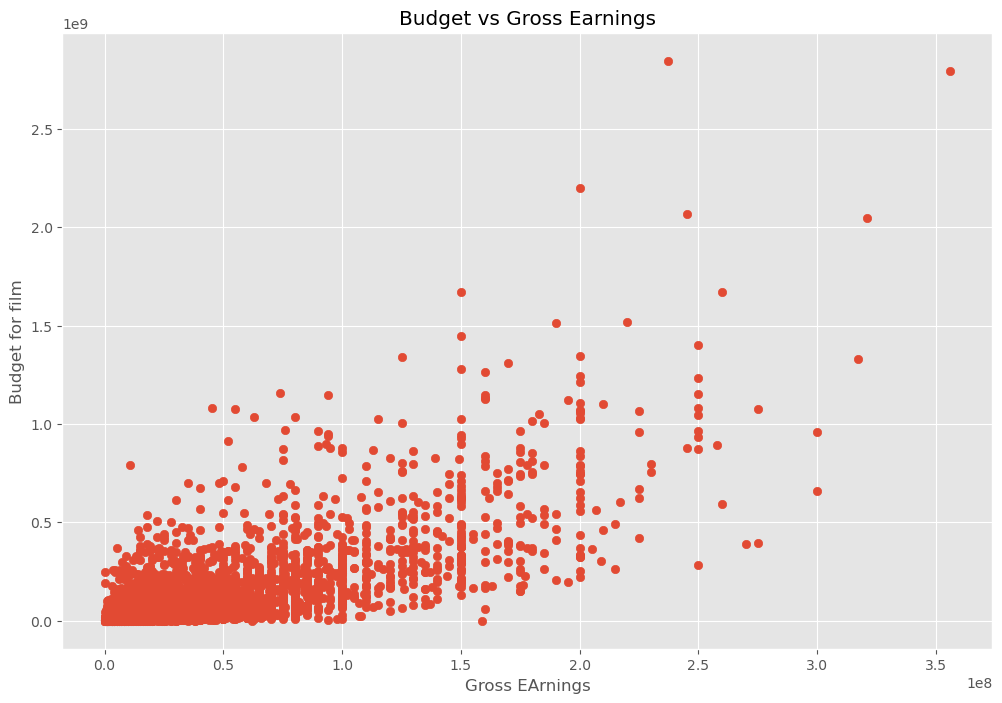

In [15]:
#Scatterplot: budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross EArnings')
plt.ylabel('Budget for film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

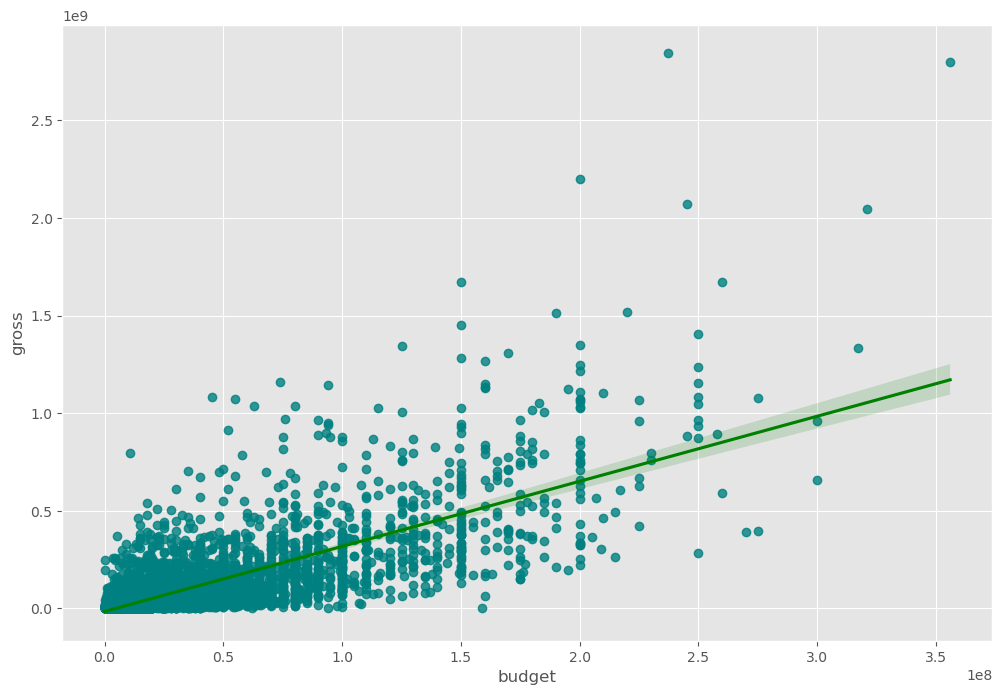

In [16]:
#Plot the budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"teal"}, line_kws={"color":"green"})

In [17]:
#Check the correlation
#Include only numeric data
df.select_dtypes(include='number').corr()

year     score     votes    budget     gross   runtime
year     1.000000  0.055681  0.204904  0.326740  0.273512  0.074849
score    0.055681  1.000000  0.474594  0.071552  0.222504  0.414501
votes    0.204904  0.474594  1.000000  0.439077  0.614432  0.352263
budget   0.326740  0.071552  0.439077  1.000000  0.740028  0.318353
gross    0.273512  0.222504  0.614432  0.740028  1.000000  0.275641
runtime  0.074849  0.414501  0.352263  0.318353  0.275641  1.000000

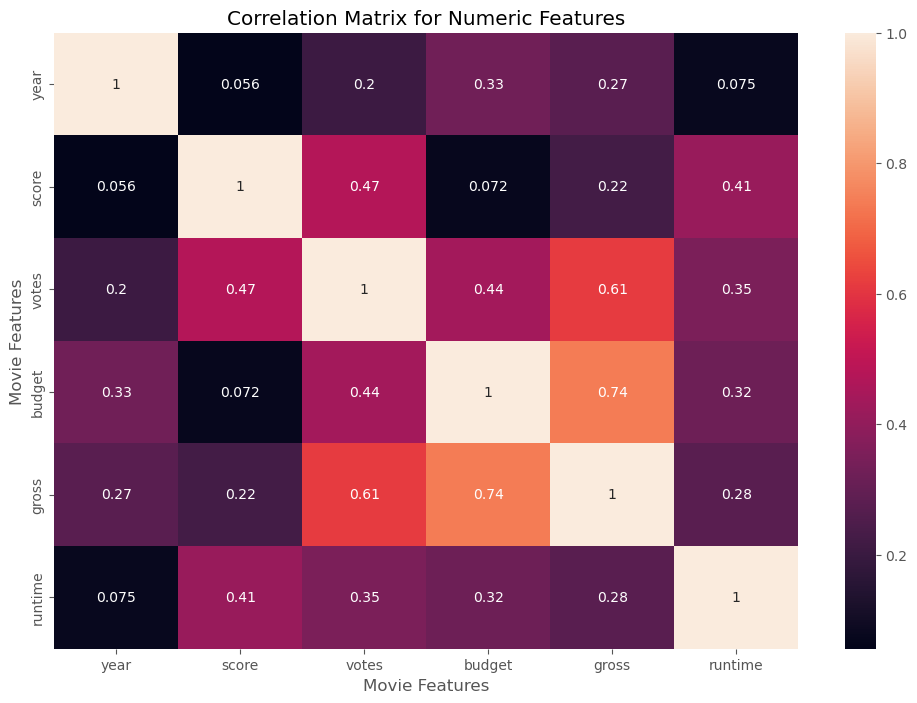

In [18]:
#Visualize the correlation using heatmap
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()